In [26]:
import numpy as np
import pandas as pd
imimport matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
plt.style.use('fivethirtyeight')
%matplotlib inlineport seaborn as sn
import plotly as px
plt.style.use('fivethirtyeight')
%matplotlib inline

In [27]:
data=pd.read_csv("Data/drugs_data.csv")

In [28]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [29]:
len(data)

161297

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [31]:
data.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [32]:
data['drugName'].unique()

array(['Valsartan', 'Guanfacine', 'Lybrel', ..., 'Mavik', 'Aldomet',
       'Grifulvin V'], dtype=object)

In [33]:
data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [34]:
data=data.dropna()

In [35]:
data.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [36]:
corr_matrix=data.corr()
corr_matrix['rating'].sort_values(ascending=False)


rating         1.000000
usefulCount    0.234379
Unnamed: 0     0.014896
Name: rating, dtype: float64

In [37]:
sn.pairplot(data)

In [40]:
# How many drugs do we have?
num = len(data['drugName'].unique().tolist())
print('number of Drugs are -',num )

number of Drugs are - 3431


In [41]:
print('Top 20 Drugs (Most Popular')
data['drugName'].value_counts().nlargest(20)

Top 20 Drugs (Most Popular


Levonorgestrel                        3631
Etonogestrel                          3321
Ethinyl estradiol / norethindrone     2750
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2033
Ethinyl estradiol / levonorgestrel    1809
Phentermine                           1538
Sertraline                            1353
Escitalopram                          1287
Mirena                                1242
Implanon                              1102
Gabapentin                            1042
Bupropion                             1017
Venlafaxine                           1012
Miconazole                             998
Citalopram                             994
Medroxyprogesterone                    971
Lexapro                                952
Bupropion / naltrexone                 945
Duloxetine                             931
Name: drugName, dtype: int64

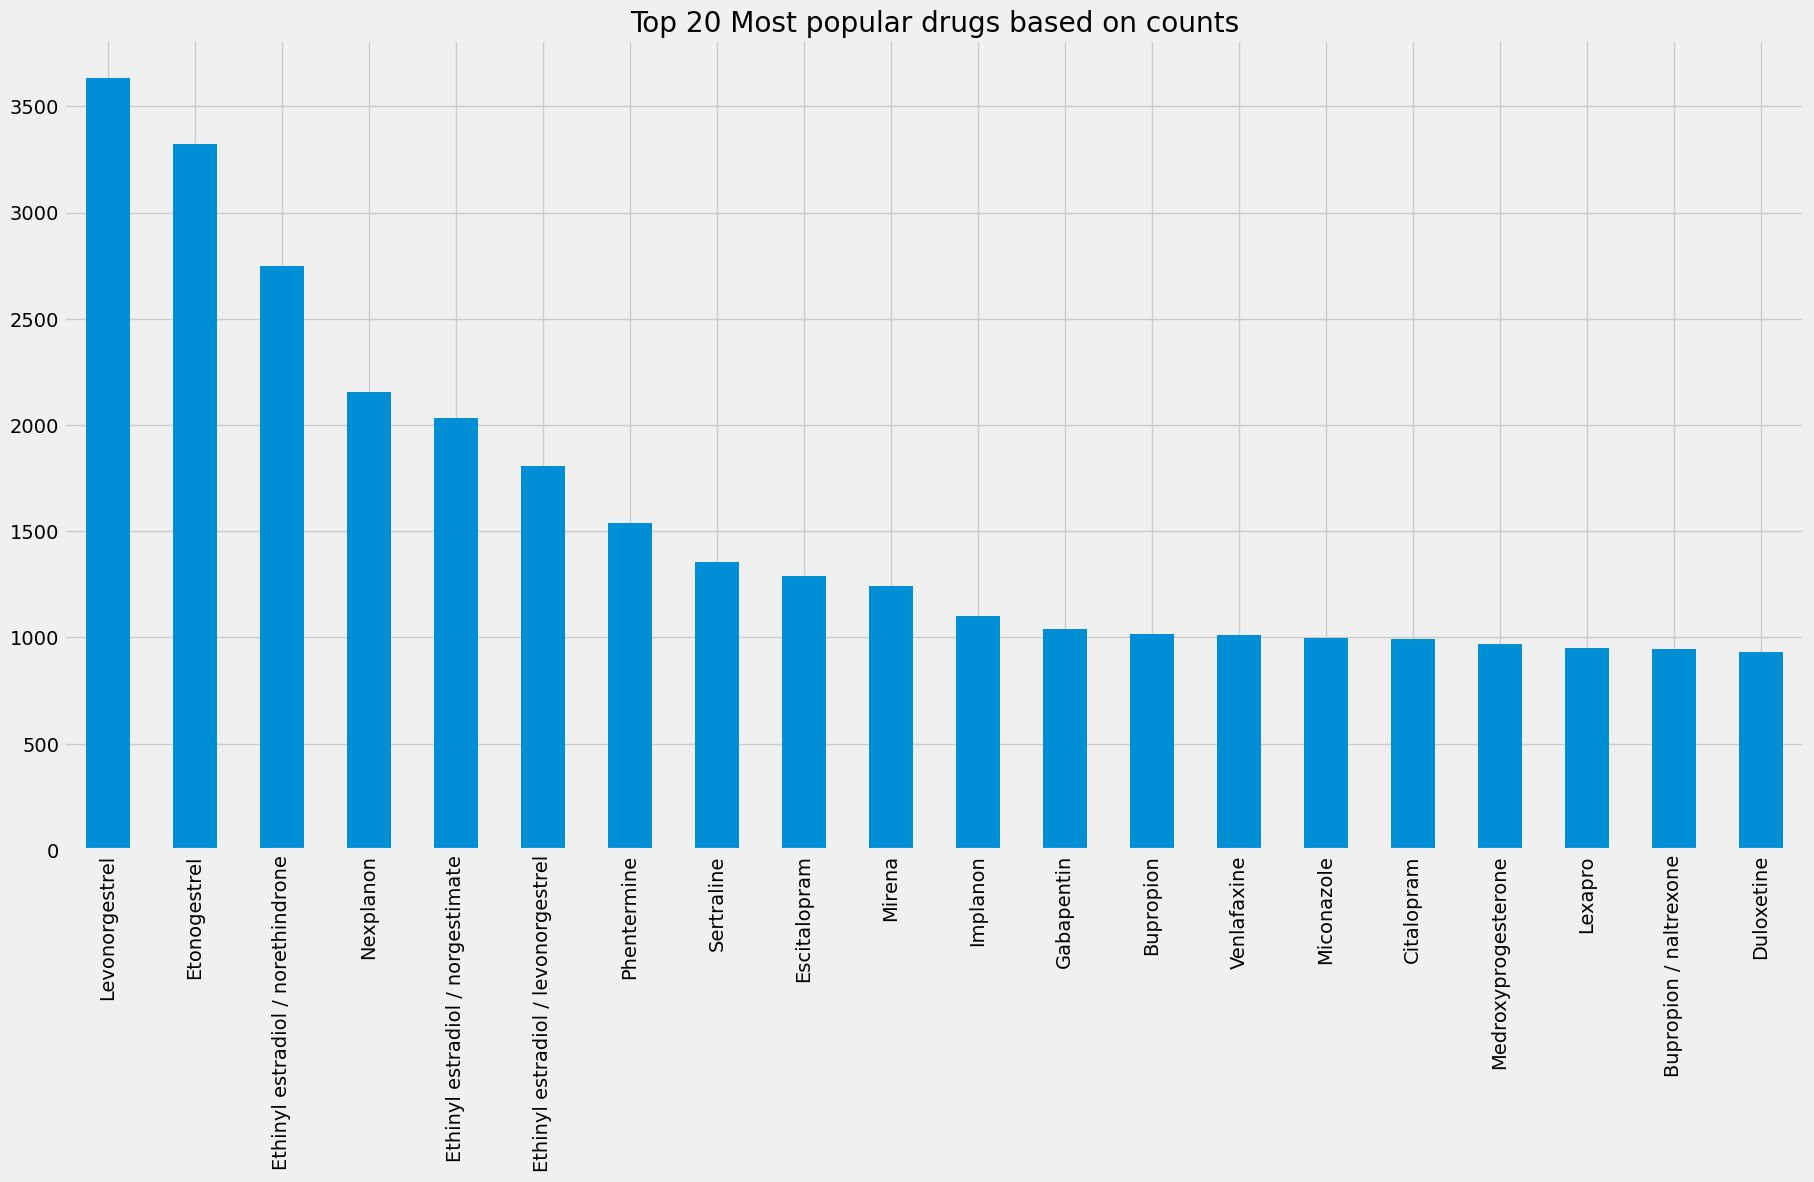

In [42]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
data['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

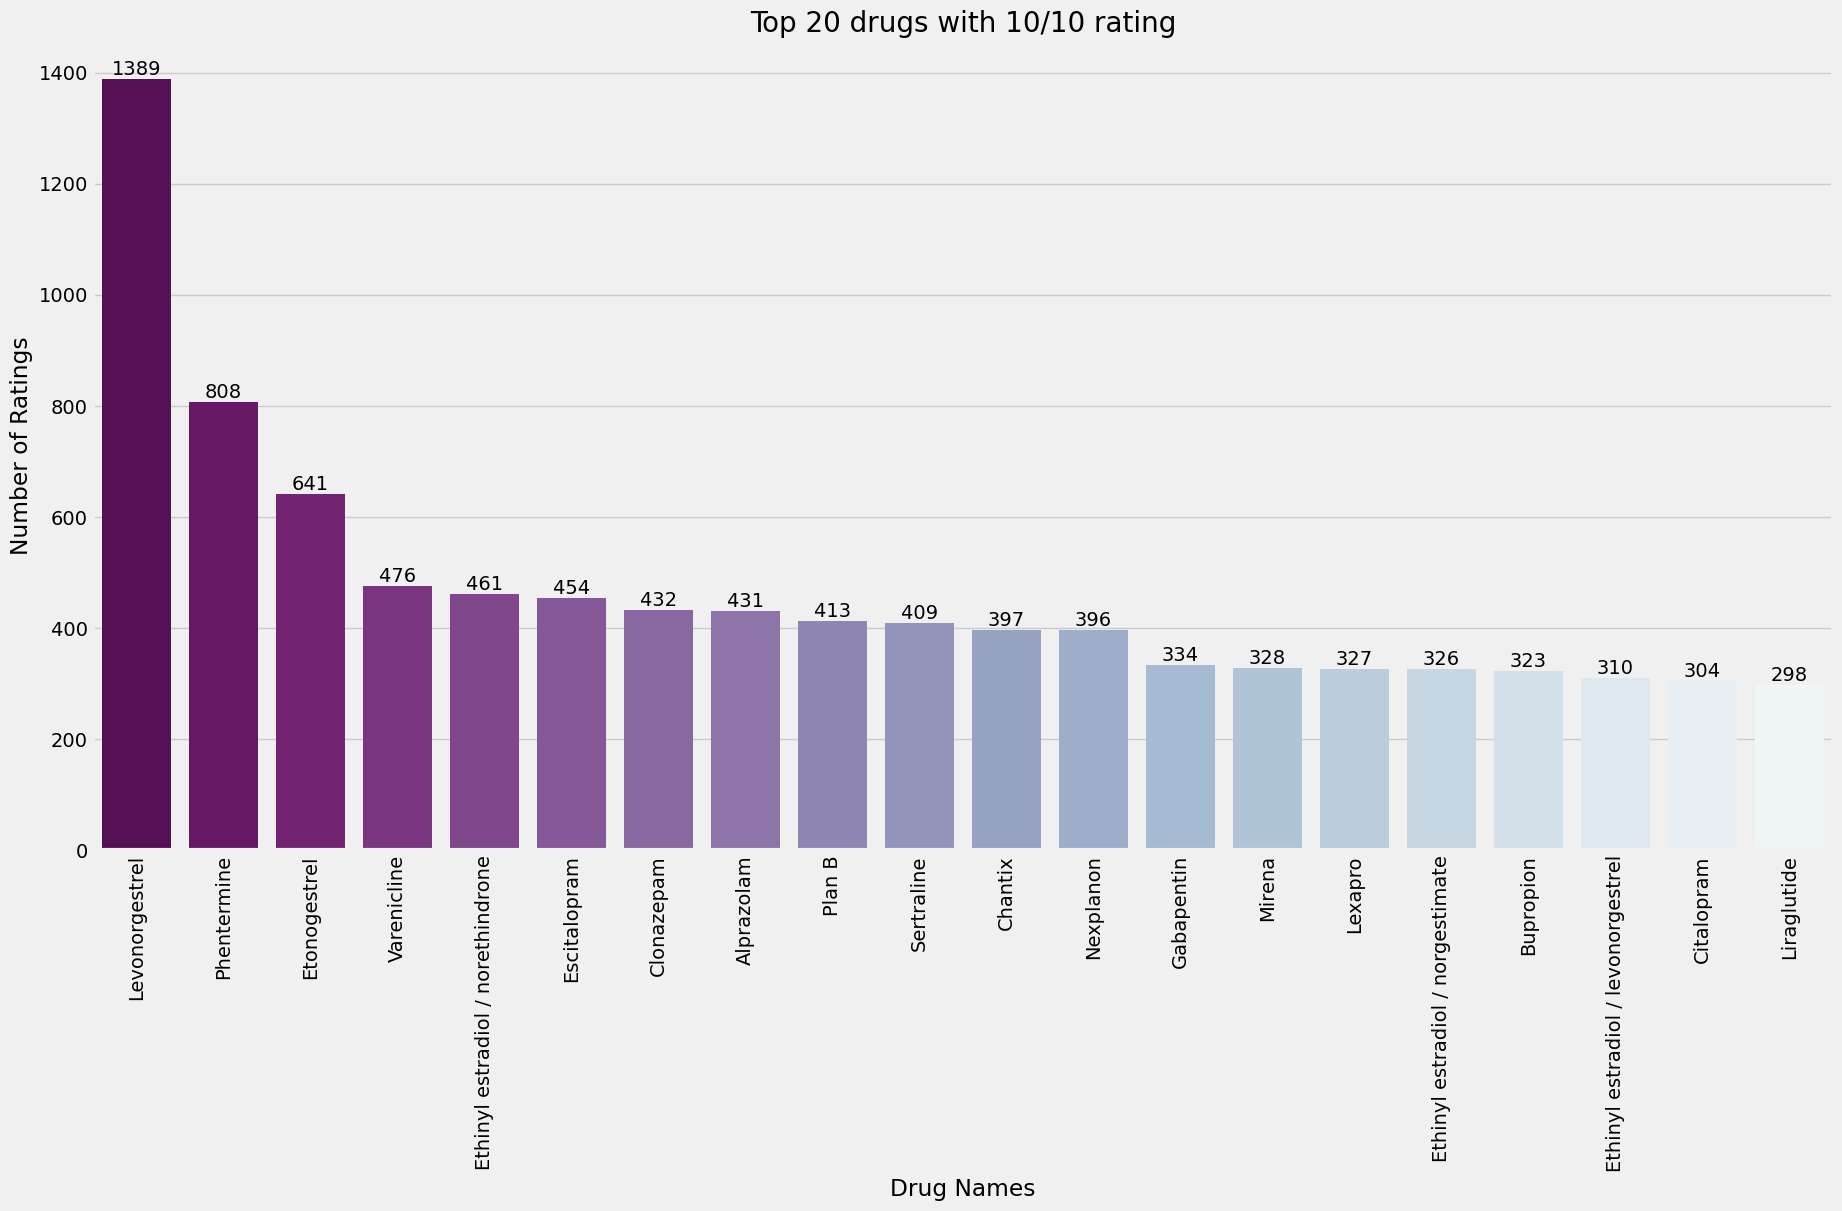

In [44]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'BuPu_r')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating', fontsize=20)
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

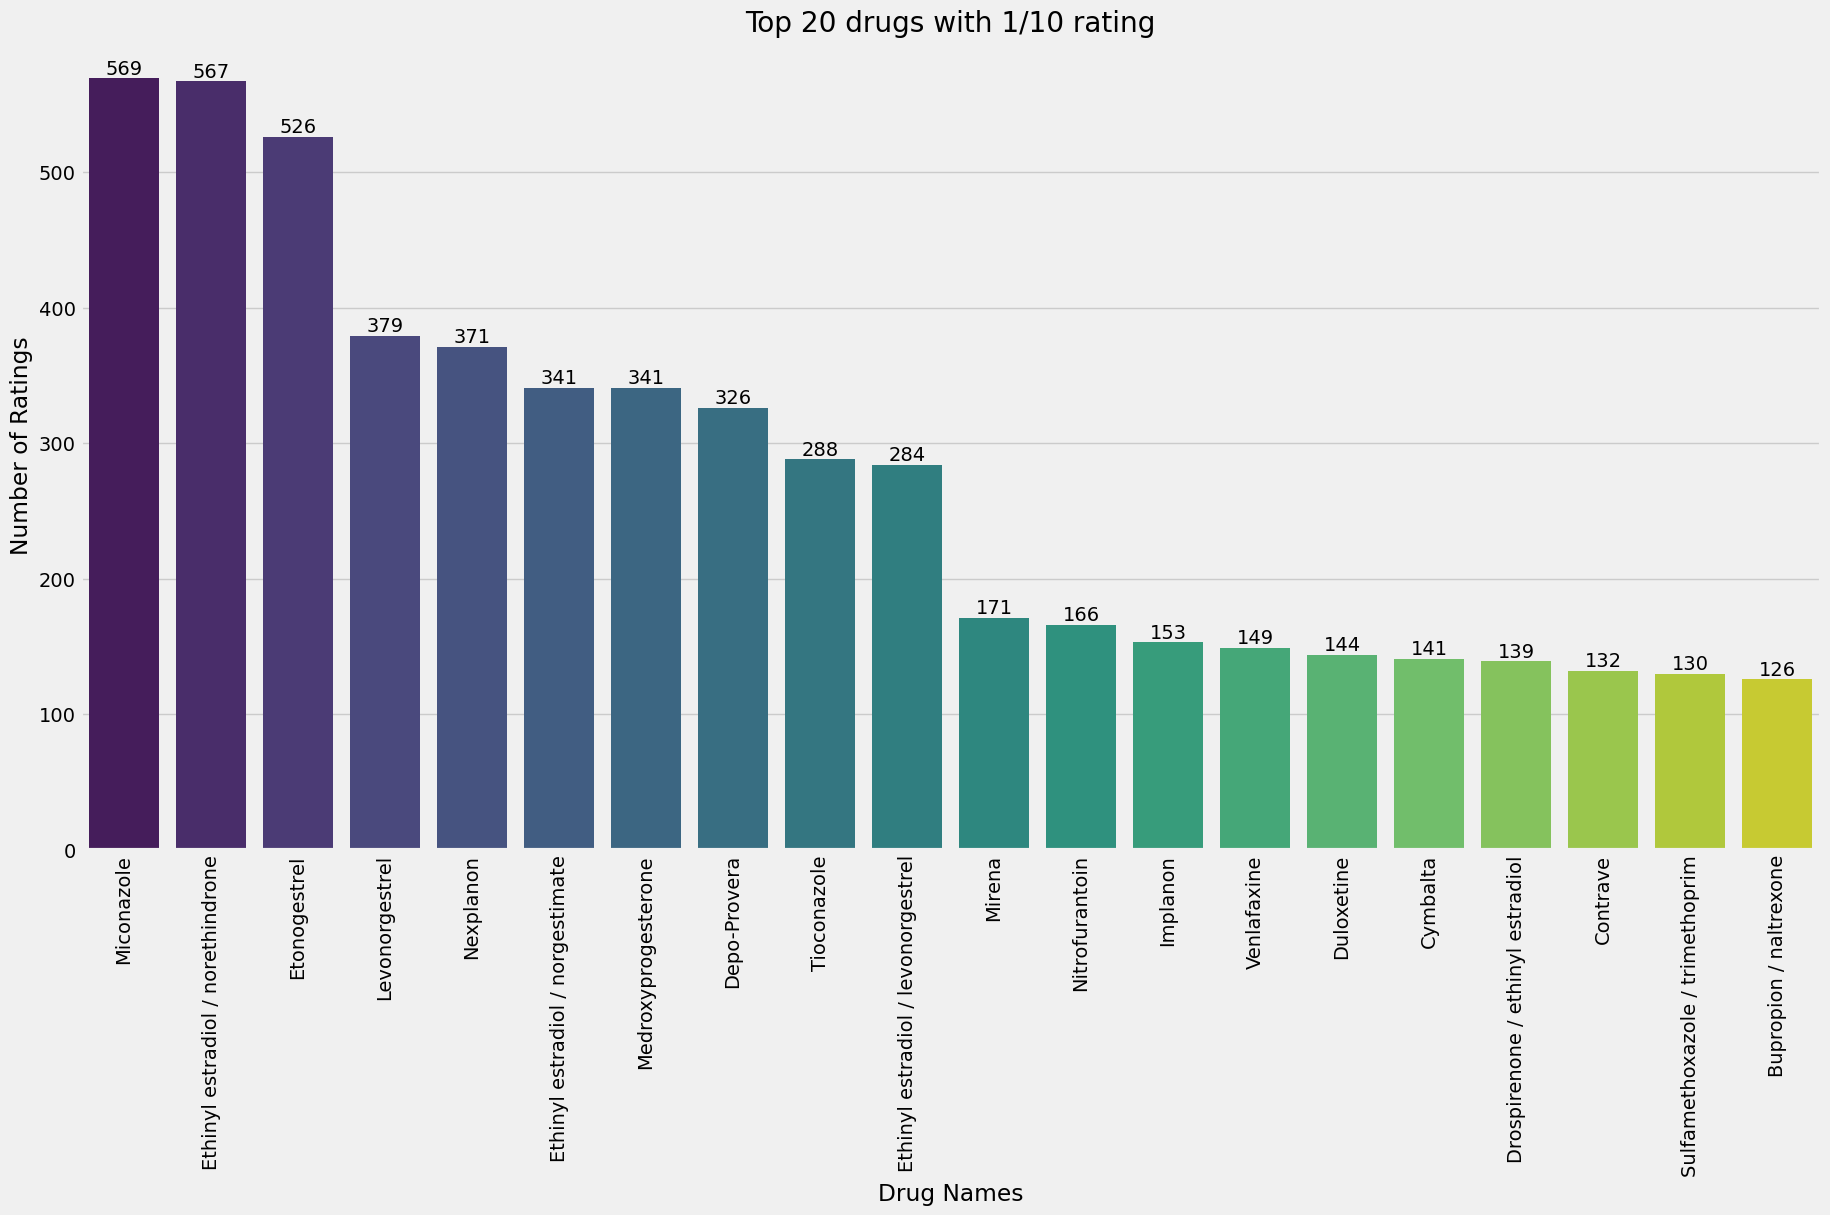

In [45]:
# Least 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'viridis')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

In [46]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [47]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [48]:
classify_drug('valsartan')

'arb blocker'

In [50]:
data['drug_class'] = data['drugName'].apply(classify_drug)

In [52]:
data[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [53]:
data['drug_class'].unique().tolist()

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [55]:
# How many Groups of Drugs By Class
grp_drugs = len(data['drug_class'].unique().tolist())
print('Groups of Drugs by Class - ',grp_drugs)

Groups of Drugs by Class -  23
